<a href="https://colab.research.google.com/github/rahiakela/mathematics-for-machine-learning/blob/main/mathematics-for-machine-learning-and-data-science-specialization/03-probability-and-statistics/week1-probability-distributions/assignment_probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability Distributions

Data plays a central role in various fields, including Data Science and Machine Learning Engineering. As time progresses, data has become increasingly crucial for making informed decisions and developing innovative products. In this assignment, you will work with data that follows different probability distributions.

**Sections**

1. **Generating Data**: Learn how to generate data that follows specific probability distributions.

2. **Naive Bayes Classifier (Continuous)**: Implement a Naive Bayes classifier for continuous data generated in Section 1.

3. **Real-Life Problem (Spam Detection)**: Enhance the Naive Bayes implementation to address a real-life problem, specifically spam detection.


##Setup

In [ ]:
!wget https://github.com/rahiakela/mathematics-for-machine-learning/raw/main/mathematics-for-machine-learning-and-data-science-specialization/03-probability-and-statistics/week1-probability-distributions/utils.py

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy.special import erfinv
from scipy.stats import uniform, binom, norm
from dataclasses import dataclass
from sklearn.metrics import accuracy_score
import pprint
pp = pprint.PrettyPrinter()

import utils
from utils import (
    estimate_gaussian_params,
    estimate_binomial_params,
    estimate_uniform_params
)

## Section 1: Generating Data from a Specific Distribution

Let's recap some concepts and formalize them to facilitate coding. Don't worry, you will be guided throughout the entire assignment!

A random variable $X$ is a function that represents a random phenomenon, meaning its exact value cannot be determined. However, probabilities can be assigned to a set of possible values it can take. For example, if $X$ has a uniform distribution on $[2, 4]$, we cannot determine the exact value of $X$, but we can say with a probability of $1$ that the value lies between $[2, 4]$. We can also say that:

$$P(X \leq 3) = \frac{1}{2}$$

where $3$ is the midpoint of the interval $[2, 4]$. Therefore, you have learned that a random variable is associated with a function called the probability density function (pdf), which encodes the probability of the random variable falling within a given range. In other words, if $X$ is a continuous random variable and $f$ is its pdf, then:

$$P(a \leq X \leq b) = \text{Area of } f \text{ between } a \text{ and } b$$

In the discrete case, $P(X = a) = f(a)$. In any case, $P(-\infty < X < +\infty) = 1$ because a random variable is assumed to output real numbers.

Another function associated with a random variable is the cumulative distribution function (cdf), denoted as $F$. It represents the probability that a random variable $X$ will be less than or equal to $x$, for any $x \in \mathbb{R}$:

$$F(x) := P(X \leq x), \quad \forall x \in \mathbb{R}$$

The cdf is a non-decreasing function and approaches $1$ as $x$ approaches infinity because it represents a probability and must yield a value between $0$ and $1$.

In the lectures, you learned that if $X$ is a random variable with cdf $F$, then $F(X)$ follows a uniform distribution between $0$ and $1$. In other words, the new random variable $F(X)$ will be uniformly distributed between $0$ and $1$. This opens up the possibility of generating artificial data with any desired distribution, given that we know $F$. The process is as follows:

1. Generate a random value $y$ uniformly from the interval $[0, 1]$.
2. Compute $F^{-1}(y)$, which is the inverse function of $F$ evaluated at $y$.

It can be shown that if $Y$ follows a uniform distribution between $0$ and $1$, then the random variable $F^{-1}(Y)$ has the same distribution as $X$.

Therefore, by computing the inverse of $F$, you can generate artificial data from any known distribution! This is an incredibly powerful technique, isn't it?

So far in the course, you have encountered three common probability distributions:
- Uniform
- Binomial
- Gaussian

In the first part of this assignment, you will code a random generator for each of the above distributions!

### Exercise 1: Uniform Generator

The natural first step is to create a function capable of generating random data that comes from the uniform distribution. You will not be coding a [pseudo-random number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (this is outside the scope of this assignment) but instead you will use a predefined function that handles this for you. If you are unsure where you can find such a function take a look at the [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function.

In [3]:
def uniform_generator(a, b, num_samples=100):
  """
  Generates an array of uniformly distributed random numbers within the specified range.

  Parameters:
  - a (float): The lower bound of the range.
  - b (float): The upper bound of the range.
  - num_samples (int): The number of samples to generate (default: 100).

  Returns:
  - array (ndarray): An array of random numbers sampled uniformly from the range [a, b).
  """
  np.random.seed(42)

  ### START CODE HERE ###
  X = np.random.uniform(a, b, num_samples)
  ### END CODE HERE ###

  return X

In [4]:
print(f"6 randomly generated values between 0 and 1:\n{np.array2string(uniform_generator(0, 1, num_samples=6), precision=3)}\n")
print(f"3 randomly generated values between 20 and 55:\n{np.array2string(uniform_generator(20, 55, num_samples=3), precision=3)}\n")
print(f"1 randomly generated value between 0 and 100:\n{np.array2string(uniform_generator(0, 100, num_samples=1), precision=3)}")

6 randomly generated values between 0 and 1:
[0.375 0.951 0.732 0.599 0.156 0.156]

3 randomly generated values between 20 and 55:
[33.109 53.275 45.62 ]

1 randomly generated value between 0 and 100:
[37.454]


**__Expected Output__**

```
6 randomly generated values between 0 and 1:
[0.375 0.951 0.732 0.599 0.156 0.156]

3 randomly generated values between 20 and 55:
[33.109 53.275 45.62 ]

1 randomly generated value between 0 and 100:
[37.454]
```

### Exercise 2:  Gaussian Generator

With your uniform data generator ready, you can go ahead and create generators for the other distributions. In order to do this you will need the inverse `CDF` for the distribution you wish to create data for.

#### 2.1 Inverse CDF - Gaussian

Let's start with a Normal Distribution generator. Usually, closed forms for CDFs are hard to obtain because they involve computing areas, which can be challenging.

In the Gaussian distribution, the closed formula uses a function called the Gaussian error function, denoted as $\text{erf}(x)$. However, you don't need to implement it or its inverse for this assignment. These functions are important in statistics, and there are many libraries available that provide their implementations.

For instance, you can use [scipy.special.erf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) and [scipy.special.erfinv](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfinv.html#scipy.special.erfinv) to compute the erf function and its inverse. Alternatively, you can find an implementation of the erf function in [math.erf](https://docs.python.org/3/library/math.html#math.erf) from the Python math library.

If $X \sim N(\mu, \sigma)$, then the CDF $F(x)$ can be expressed as:

$$y = F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right].$$

With some simple calculations and denoting ${\text{erf}}^{-1}$ as the inverse of the $\text{erf}$ function, it can be shown that:

$$x = F^{-1}(y) = \sigma \sqrt{2} \cdot \text{erf}^{-1}(2y - 1) + \mu.$$

In [8]:
def inverse_cdf_gaussian(y, mu, sigma):
  """
  Calculates the inverse cumulative distribution function (CDF) of a Gaussian distribution.

  Parameters:
  - y (float or ndarray): The probability or array of probabilities.
  - mu (float): The mean of the Gaussian distribution.
  - sigma (float): The standard deviation of the Gaussian distribution.

  Returns:
  - x (float or ndarray): The corresponding value(s) from the Gaussian distribution that correspond to the given probability/ies.
  """
  ### START CODE HERE ###
  x = mu + scipy.special.erfinv(2 * y - 1) * sigma * (2 ** 0.5)
  ### END CODE HERE ###
  return x

In [9]:
# Test your function
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1e-10}: {inverse_cdf_gaussian(1e-10, 15, 5):.3f}")
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {0}: {inverse_cdf_gaussian(0, 15, 5)}")
print(f"Inverse of Gaussian CDF with mu {20} and sigma {0.5} for value {0.4}: {inverse_cdf_gaussian(0.4, 20, 0.5):.3f}")
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1}: {inverse_cdf_gaussian(1, 15, 5)}")

Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1e-10: -16.807
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 0: -inf
Inverse of Gaussian CDF with mu 20 and sigma 0.5 for value 0.4: 19.873
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1: inf


**__Expected Output__**

```
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1e-10: -16.807
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 0: -inf
Inverse of Gaussian CDF with mu 20 and sigma 0.5 for value 0.4: 19.873
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1: inf
```

#### 2.2 Gaussian Generator

Now that you have all the necessary information, you can create a generator for data that follows a Gaussian distribution with a specified $\mu$ and $\sigma$. Similar to the generator for uniformly distributed data, the `gaussian_generator` function should allow you to specify the number of samples to generate. **Make sure to utilize the functions you have defined earlier in the assignment.**

In [10]:
def gaussian_generator(mu, sigma, num_samples):
  ### START CODE HERE ###
  # Generate an array with num_samples elements that distribute uniformally between 0 and 1
  uniform_dist = uniform_generator(0, 1, num_samples)

  # Use the uniform-distributed sample to generate Gaussian-distributed data
  # Hint: You need to sample from the inverse of the CDF of the distribution you are generating
  X = inverse_cdf_gaussian(uniform_dist, mu, sigma)
  ### END CODE HERE ###
  return X

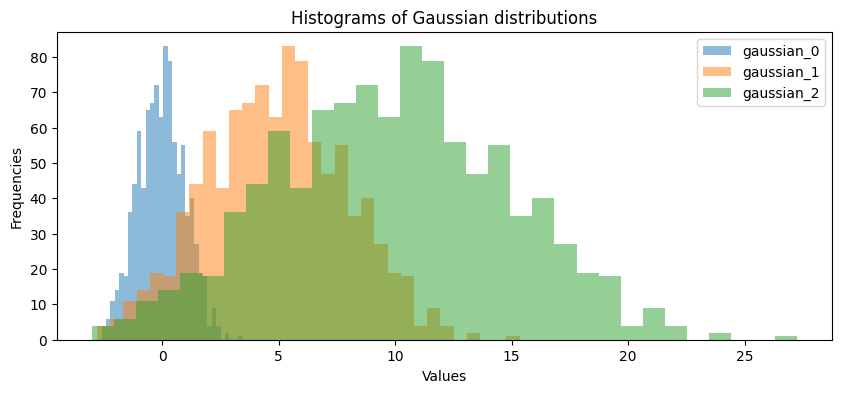

In [11]:
# Test your function
gaussian_0 = gaussian_generator(0, 1, 1000)
gaussian_1 = gaussian_generator(5, 3, 1000)
gaussian_2 = gaussian_generator(10, 5, 1000)

utils.plot_gaussian_distributions(gaussian_0, gaussian_1, gaussian_2)

**__Expected Output__**

<img src="https://github.com/rahiakela/mathematics-for-machine-learning/blob/main/mathematics-for-machine-learning-and-data-science-specialization/03-probability-and-statistics/week1-probability-distributions/images/gaussian.png?raw=1" style="height: 300px;"/>


### Exercise 3: Binomial Generator

#### 3.1 Inverse CDF - Binomial

If $X \sim \text{Binomial}(n,p)$, then its PDF is given by:

$$P(X = k) = {n \choose k}p^{k}(1-p)^{n-k}.$$

Therefore, if $0 \leq x \leq n$, its CDF is given by:

$$F(x) = P(X \leq x) = P(X = 0) + P(X = 1) + \ldots + P(X = \lfloor x \rfloor) = \sum_{k=0}^{\lfloor x \rfloor} {n \choose k}p^{k}(1-p)^{n-k}.$$

Here, $\lfloor x \rfloor$ denotes the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions), which returns the greatest integer less than or equal to $x$. For example, $\lfloor 2.9 \rfloor = 2$ and $\lfloor 1.2 \rfloor = 1$. This function is necessary because the domain of $F$ is the entire set of real numbers, but $P(X = k)$ is non-zero only for positive integer values.

If $x > n$, then $F(x) = 1$. It is important to note that the expression for $F(x)$ can become complex and messy, and there is no closed-form expression for the inverse function $F^{-1}$ in this case. However, statistical libraries provide implementations of the inverse CDF using [generalized quantile functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Inverse_distribution_function_.28quantile_function.29). You can refer to [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) for an example of a library that implements these functions. In particular, the `scipy.stats.binom.ppf` function is what you need. Since the `binom` class is already imported, you can use `help(binom)` to explore its parameters and functions. The function you will need is located in the "Methods" section: `ppf`.
